### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7304\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
data.corr().Profit.sort_values(ascending=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7304\464908146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().Profit.sort_values(ascending=False)


Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

### Checking for null values

In [7]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
data.State.nunique()

3

In [10]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Data Visualization

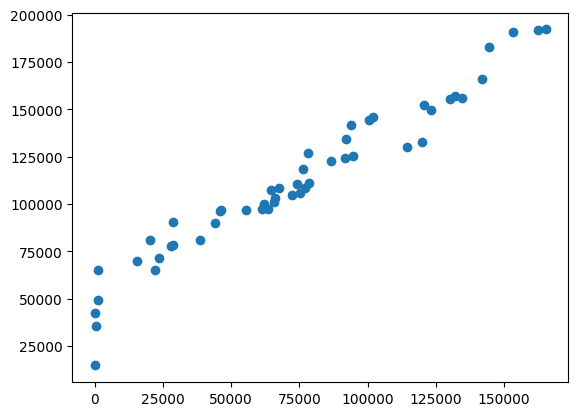

In [12]:
plt.scatter(data['R&D Spend'],data['Profit'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7304\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

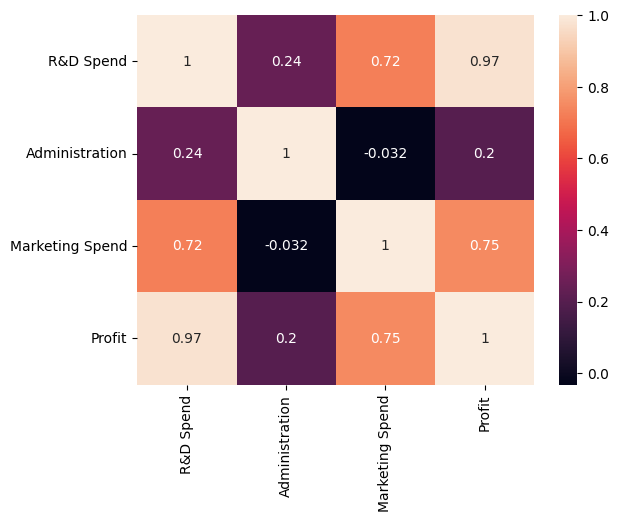

In [13]:
sns.heatmap(data.corr(),annot=True)

### Outlier Detection

<Axes: >

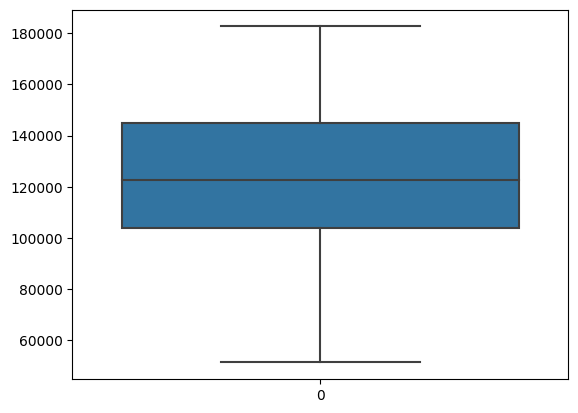

In [14]:
sns.boxplot(data['Administration'])

<Axes: >

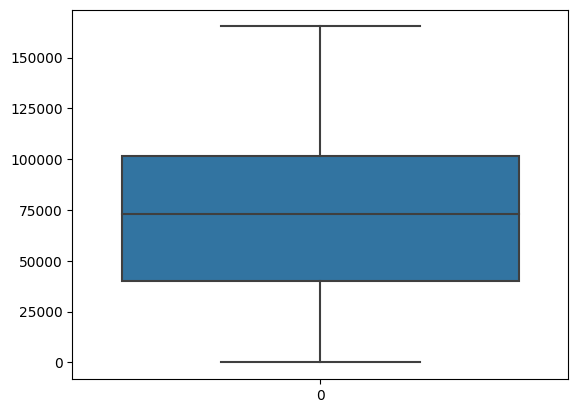

In [15]:
sns.boxplot(data['R&D Spend'])

<Axes: >

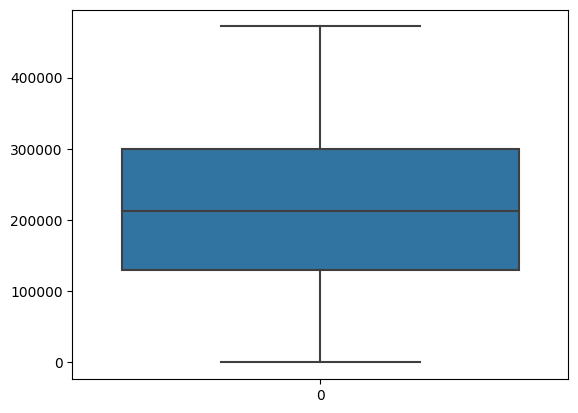

In [16]:
sns.boxplot(data['Marketing Spend'])


### Splitting Dependent and Independent variables

In [17]:
x=data.drop(columns=['Profit'],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [18]:
y=data['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
ls=LabelEncoder()


In [20]:
x['State']=ls.fit_transform(x['State'])

In [21]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [22]:
print(ls.classes_)

['California' 'Florida' 'New York']


In [23]:
mapping=dict(zip(ls.classes_,range(len(ls.classes_))))
mapping

{'California': 0, 'Florida': 1, 'New York': 2}

### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [25]:
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x_scaled

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5
5,0.797566,0.369448,0.769126,1.0
6,0.814128,0.730161,0.270710,0.0
7,0.788018,0.717457,0.686493,0.5
8,0.729018,0.741733,0.660500,1.0
9,0.745906,0.436929,0.646443,0.0


### Train test Split

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

### Model building

### Ridge Regression

In [27]:
from sklearn import linear_model
ridge_regressor=linear_model.Ridge();

In [28]:
from sklearn.model_selection import GridSearchCV
parameters={"alpha":[1,2,3,5,10,20,30,40,60,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 60, 80, 90]},
             scoring='neg_mean_squared_error')

In [29]:
print(ridgecv.best_params_)

{'alpha': 1}


In [30]:
print(ridgecv.best_score_)

-239673079.29162955


In [31]:
y_pred=ridgecv.predict(xtest)

In [32]:
y_pred

array([106588.96111489, 122680.02187719, 125750.4526799 ,  80105.87177737,
       164788.14396038, 123759.77139893,  77756.49181374, 100589.89370652,
       118387.93230804, 154752.91102484])

In [34]:
profit=pd.DataFrame({"Actual_profit":ytest,"Predicted _profit":y_pred})

In [35]:
profit

,Actual_profit,Predicted _profit
28,103282.38,106588.961115
11,144259.40,122680.021877
10,146121.95,125750.452680
41,77798.83,80105.871777
2,191050.39,164788.143960
27,105008.31,123759.771399
38,81229.06,77756.491814
31,97483.56,100589.893707
22,110352.25,118387.932308
4,166187.94,154752.911025


### Random Value Prediction

In [36]:
ridgecv.predict([[165349.20,136897.80,471784.10,2]])

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([3.2900941e+10])

In [37]:
ridgecv.predict(ms.transform([[165349.20,136897.80,471784.10,2]]))

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([181570.97027084])

### Evaluation of Model

In [38]:
from sklearn import metrics
print(metrics.r2_score(ytest,y_pred))
print(metrics.r2_score(ytrain,ridgecv.predict(xtrain)))
print(metrics.mean_squared_error(ytest,y_pred))
print(np.sqrt(metrics.mean_squared_error(ytest,y_pred)))
print(metrics.mean_absolute_error(ytest,y_pred))

0.8314723168235725
0.9064461763118312
215528637.20262003
14680.893610493198
11862.781894970885


### Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

In [40]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [41]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 90}
-109980851.83110225


In [43]:
y_pred=lassocv.predict(xtest)
y_pred

array([103103.66261062, 133158.03378258, 133783.68799679,  73623.65266564,
       179565.86603201, 114704.41866598,  68164.16515074,  98060.29527212,
       114457.92032367, 169281.31995687])

In [44]:
y_predict_1= lassocv.predict(xtrain)
y_predict_1

array([ 96979.17402427,  89165.42793655, 110405.62243372,  90320.85424733,
       127961.39218104, 159350.05732246, 149263.44944855,  48031.89337418,
        46774.20288191, 102152.12771605, 144890.49007264,  98304.96369957,
        98057.79563668, 116265.35916501,  69827.92984061, 115884.63472383,
        60461.17942622, 151467.51445365, 126977.28616704, 102058.26285045,
       161371.24146749, 130289.37416103,  74863.86285056,  48357.5176859 ,
       188347.6921282 , 128342.82380728,  86811.91849019, 111518.86572733,
       156463.12916311, 109258.56846581,  75873.70650887, 118224.9517871 ,
       115034.70109679, 152799.51895664,  82179.17717209,  57410.5911765 ,
       171992.22770242, 191384.61266259,  47145.7241208 ,  65588.06726752])

In [46]:
profit =pd.DataFrame({'Actual_profit':ytest,'Predicted_profit':y_pred})
profit

,Actual_profit,Predicted_profit
28,103282.38,103103.662611
11,144259.40,133158.033783
10,146121.95,133783.687997
41,77798.83,73623.652666
2,191050.39,179565.866032
27,105008.31,114704.418666
38,81229.06,68164.165151
31,97483.56,98060.295272
22,110352.25,114457.920324
4,166187.94,169281.319957


In [47]:
lassocv.predict(ms.transform([[165349.20,136897.80,471784.10,2]]))

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([191384.61266259])

In [49]:
from sklearn import metrics
# R- Square
# evaluating testing accuracy
print(metrics.r2_score(ytest,y_pred))

# evaluating training accuracy
print(metrics.r2_score(ytrain,y_predict_1))

# MSE (Mean square Error)
print(metrics.mean_squared_error(ytest,y_pred))

print(metrics.mean_absolute_error(ytest,y_pred))

0.943990911024447
0.9497895045479317
71629553.02259628
6981.483598024565
